In [1]:
import pandas as pd, numpy as np

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     452583 non-null  int64  
 1   user           452583 non-null  object 
 2   date           452583 non-null  object 
 3   content        452583 non-null  object 
 4   user_location  307280 non-null  object 
 5   tweets         452554 non-null  object 
 6   Positive       452583 non-null  float64
 7   Negative       452583 non-null  float64
 8   Neutral        452583 non-null  float64
 9   Status         452583 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 34.5+ MB


In [4]:
df.drop(columns=['Unnamed: 0','tweets','Positive','Negative','Neutral','Status'],inplace=True)

In [5]:
data=df.copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user           452583 non-null  object
 1   date           452583 non-null  object
 2   Tweets         452583 non-null  object
 3   user_location  307280 non-null  object
dtypes: object(4)
memory usage: 13.8+ MB


In [10]:
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
df.rename(columns={'content':'Tweets'},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user           452583 non-null  object
 1   date           452583 non-null  object
 2   Tweets         452583 non-null  object
 3   user_location  307280 non-null  object
dtypes: object(4)
memory usage: 13.8+ MB


In [17]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'RT[\s]+','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('hxxps?://\S+|www\.\S+', '', text)
    text = re.sub('godaddy', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweets"] = df["Tweets"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df

,user,date,Tweets,user_location,tweets
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????,go hell bob parson spineless fuck stop coward...
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thank fire
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proud present check let know think none goce...
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You don??t n...,Global,want boss dont need go biz school entrepreneu...
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,everi cunti eleph kill bob parson hundr fanta...
...,...,...,...,...,...
452578,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,Possible threat on hxxps://rediction-carte-vit...,"Roma, Lazio",possibl threat phish
452579,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,Possible threat on hxxp://shivbets[.]com #god...,"Roma, Lazio",possibl threat
452580,"{'username': 'hytyjyu', 'id': 1551087273160036...",2022-09-23 08:02:29+00:00,@tsa_gamefi @MetascanPro @JoshMalina @whoisadd...,NaN,gamefi
452581,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,adobe express why do u nawt hv a layer somethi...,"she/they, minor, works on â¡ï¸",adob express u nawt hv layer someth like canva...


In [19]:
#Create a function to get the Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [20]:
#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [21]:
#Create two new columns
df['Subjectivity']=df['tweets'].apply(getSubjectivity)
df['Polarity']=df['tweets'].apply(getPolarity)

df

,user,date,Tweets,user_location,tweets,Subjectivity,Polarity
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????,go hell bob parson spineless fuck stop coward...,0.6,-0.4
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thank fire,0.0,0.0
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proud present check let know think none goce...,0.5,0.4
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You don??t n...,Global,want boss dont need go biz school entrepreneu...,0.0,0.0
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,everi cunti eleph kill bob parson hundr fanta...,0.0,0.0
...,...,...,...,...,...,...,...
452578,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,Possible threat on hxxps://rediction-carte-vit...,"Roma, Lazio",possibl threat phish,0.0,0.0
452579,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,Possible threat on hxxp://shivbets[.]com #god...,"Roma, Lazio",possibl threat,0.0,0.0
452580,"{'username': 'hytyjyu', 'id': 1551087273160036...",2022-09-23 08:02:29+00:00,@tsa_gamefi @MetascanPro @JoshMalina @whoisadd...,NaN,gamefi,0.0,0.0
452581,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,adobe express why do u nawt hv a layer somethi...,"she/they, minor, works on â¡ï¸",adob express u nawt hv layer someth like canva...,0.0,0.0


In [26]:
df[df['Polarity']<0.0].shape[0]/df.shape[0]

0.0811939467456798

In [28]:
df[df['Polarity']>0.0]

,user,date,Tweets,user_location,tweets,Subjectivity,Polarity
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proud present check let know think none goce...,0.500000,0.400000
5,"{'username': 'MccrelessTravis', 'id': 10715028...",2019-01-07 23:44:10+00:00,Proudly presenting https://t.co/EeTt0jt3B4. Ch...,"Mackinaw city, michigan",proud present check let know think gocentr via,0.500000,0.400000
6,"{'username': 'joeczucha', 'id': 21409392, 'dis...",2019-01-07 23:43:23+00:00,@iamjeffperry @DanielCBerman @RosemaryOrchard ...,NaN,taken webfact theyr creat us account ...,0.502273,0.243182
10,"{'username': 'ACELTICEYE', 'id': 1082385715571...",2019-01-07 23:28:42+00:00,Proudly presenting https://t.co/1pIZlWJOvC. Ch...,USA,proud present check let know think none goce...,0.500000,0.400000
11,"{'username': 'ItsikRomano', 'id': 57819532, 'd...",2019-01-07 23:26:54+00:00,Does @GoDaddy sell your contact info to spamme...,Montreal - Quebec - Canada,sell contact info spammer india sinc purchas ...,0.333333,0.250000
...,...,...,...,...,...,...,...
452567,"{'username': 'baptistaresearc', 'id': 96367719...",2022-09-23 06:10:00+00:00,Check out our latest report on - GoDaddy Inc $...,NaN,check latest report inc gddi economi stock ...,0.900000,0.500000
452569,"{'username': 'frequencyfixx', 'id': 4066248553...",2022-09-23 06:20:04+00:00,Don't miss a beat! Get the latest updates and ...,"West Hollywood, CA",dont miss beat get latest updat subscrib ema...,0.900000,0.500000
452570,"{'username': 'KeriKelsey', 'id': 192494099, 'd...",2022-09-23 06:23:53+00:00,@GoDaddy So disappointed youâre more interes...,NaN,disappoint youâr interest get new custom ke...,0.218182,0.078788
452571,"{'username': 'africangrillbar', 'id': 13153658...",2022-09-23 06:39:15+00:00,Proudly presenting https://t.co/cUupZMQHIE. Ch...,Lakewood & green valley Ranch,proud present check let know think websitebu...,0.500000,0.400000


In [33]:
#Create a function to compute the negative, positive and neutral analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Status']=df['Polarity'].apply(getAnalysis)

df

,user,date,Tweets,user_location,tweets,Subjectivity,Polarity,Status
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????,go hell bob parson spineless fuck stop coward...,0.6,-0.4,Negative
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thank fire,0.0,0.0,Neutral
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proud present check let know think none goce...,0.5,0.4,Positive
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You don??t n...,Global,want boss dont need go biz school entrepreneu...,0.0,0.0,Neutral
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,everi cunti eleph kill bob parson hundr fanta...,0.0,0.0,Neutral
...,...,...,...,...,...,...,...,...
452578,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,Possible threat on hxxps://rediction-carte-vit...,"Roma, Lazio",possibl threat phish,0.0,0.0,Neutral
452579,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,Possible threat on hxxp://shivbets[.]com #god...,"Roma, Lazio",possibl threat,0.0,0.0,Neutral
452580,"{'username': 'hytyjyu', 'id': 1551087273160036...",2022-09-23 08:02:29+00:00,@tsa_gamefi @MetascanPro @JoshMalina @whoisadd...,NaN,gamefi,0.0,0.0,Neutral
452581,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,adobe express why do u nawt hv a layer somethi...,"she/they, minor, works on â¡ï¸",adob express u nawt hv layer someth like canva...,0.0,0.0,Neutral


In [34]:
data=df.copy()

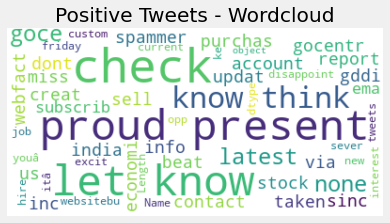

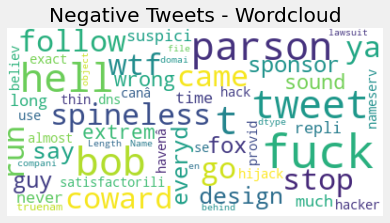

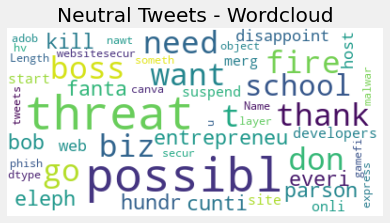

In [43]:
# let's create some wordclouds to see which words are the most used for each sentiment:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = data['tweets'][data["Status"] == 'Positive']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = data['tweets'][data["Status"] == 'Negative']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with neutral tweets
neutral_tweets = data['tweets'][data["Status"] == 'Neutral']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(neutral_tweets))
plt.figure()
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [46]:
df['Status'].value_counts(normalize=True)*100

Neutral     52.665699
Positive    39.214906
Negative     8.119395
Name: Status, dtype: float64

In [73]:
df[['Tweets','tweets']][df['Status']=='Neutral'].head(50)

,Tweets,tweets
1,@hullboydan Thanks. Now how do I fire GoDaddy?,thank fire
3,So you want to be your own boss? You don??t n...,want boss dont need go biz school entrepreneu...
4,For every cunty elephant killing #GoDaddy Bob ...,everi cunti eleph kill bob parson hundr fanta...
7,@bergus @webfaction @GoDaddy Very disappointin...,disappoint web host developers merg onli...
9,Where to Start When GoDaddy Suspends Your Site...,start suspend site websitesecur secur malwar
12,https://t.co/OoOHJEZxtz \n\n#fpv #quadcopters ...,fpv quadcopt fpvracingdomain sale buy
13,Every step along the way is a step toward acco...,everi step along way step toward accomplish dr...
19,Thanks to @GoDaddy support team my website is ...,thank support team websit back run
20,https://t.co/6EFVVSVc6v . . . #DomainNameForSa...,domainnameforsal list
25,@MsLeahCatherine @hullboydan @GoDaddy @GoDaddy...,yep site host competitor


In [64]:
df['Tweets'].iloc[13,:]

IndexingError: Too many indexers